In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('datasets/Part1/bank.csv')

# 1. Data Understanding ------------------

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Comment: Here I have read the Bank-Full dataset using read_csv() function of pandas. df is a dataframe. I have used head() funtion to display first 5 records of the dataset.

In [4]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 45211
Total Number of columns : 17


Comment: Shape of the dataframe is (45211, 17). There are 45211 rows and 17 columns in the dataset. Out of 17 columns 16 is our independent variables and 1(Target) is our dependent variable.

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Comment: By displaying the datatypes of each variable we can see the following:

* int type : age, balance, day, duration, campaign, pdays, previous    
* object type(string): job, marital, education, default, housing, loan, contact, month, poutcome, Target
* As we can see the datatypes several of variables are string object. So, we will be changing it to appropriate datatype in data cleaning part.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Many columns are of type object i.e. strings. These need to be converted to ordinal type

.


# 2. Data Transformation ------------------

### a)

Changing the categorical data into numeric using label encoder

In [7]:
#changing housing variables into binary
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
labels = label_encode.fit_transform(df['housing'])
df['housing'] = labels
df.drop(columns='housing')

,age,job,marital,education,default,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df['default'])
df['default'] = labels
df.drop(columns='default')

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,0,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,0,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,0,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,0,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,0,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df['loan'])
df['loan'] = labels
df.drop(columns='loan')

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df['y'])
df['y'] = labels
df.drop(columns='y')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown


In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


housing, default, loan and the target variable y has been changed into binary

### b)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int32 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int32 
 7   loan       45211 non-null  int32 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(4), int64(7), object(6)
memory usage: 5.2+ MB


Our target columns are 'job', 'education', 'marital', 'contact', 'month' and 'poutcome' Changing these columns into ordinal numbers based on cases number in the dataset

In [13]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  int32   
dtypes: category(6), int32(4), int64(7)
memory usage: 3.4 MB


Comment : We can see above all the object tpye is converted to category type

In [15]:
print(df.job.value_counts())
print('\n',df.marital.value_counts())
print('\n',df.education.value_counts())
print('\n',df.contact.value_counts())
print('\n',df.month.value_counts())
print('\n',df.poutcome.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


Comment : In below code I have created a dictionary and encoded the categorical variable with some numbers.

In [16]:
replaceStruct = {
                "job" :      {"blue-collar":1, "management":2, "technician":3, "admin.":4, "services":5, "retired":6,
                "self-employed":7, "entrepreneur":8, "unemployed":9, "housemaid":10, "student":11, "unknown":12},
    
                "marital":   {"married":1, "single":2, "divorced":3},
    
                "education": {"secondary":1, "tertiary":2, "primary":3, "unknown":4},
                
                "contact":   {'cellular':1, 'unknown':2, 'telephone':3},
    
                "month":     {"may":1, "jul":2, "aug":3,"jun":4,"nov":5,"apr":6,
                 "feb":7,"jan":8,"oct":9,"sep":10,"mar":11,"dec":12},
    
                "poutcome":  {'unknown':1, 'failure':2, 'other':3, 'success':4},
                    }

df=df.replace(replaceStruct)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,2,0,2143,1,0,2,5,1,261,1,-1,0,1,0
1,44,3,2,1,0,29,1,0,2,5,1,151,1,-1,0,1,0
2,33,8,1,1,0,2,1,1,2,5,1,76,1,-1,0,1,0
3,47,1,1,4,0,1506,1,0,2,5,1,92,1,-1,0,1,0
4,33,12,2,4,0,1,0,0,2,5,1,198,1,-1,0,1,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int32
dtypes: int32(4), int64(13)
memory usage: 5.2 MB


Comment: Above we can see all the columns are converted to integer type.

In [18]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Comment: Here total missing values count from each column is 0 and we can see there is no missing value in the dataframe

Let’s try to test whether any attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values. Using the below code snippet we are going to test whether our dataframe consists of categorical variables with values as “?”.

In [19]:
for value in df.columns:
     print(value,":", sum(df[value] == '?'))

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
y : 0


Comment : From above we can see that there is no columns with '?' values in our dataset.

### c)

In [20]:
def classes_def(x):
    if x >= 18 and x<=19:
        return "1"
    elif x >=20 and x<=25:
        return "2"
    elif x >=26 and x<=30:
        return "3" 
    elif x >=31 and x<=35:
        return "4" 
    elif x >=36 and x<=40:
        return "5"
    elif x >=41 and x<=49:
        return "6"
    elif x >=50 and x<=59:
        return "7"
    elif x >=60 and x<=69:
        return "8"
    elif x >=70 and x<=79:
        return "9"
    elif x >=80 :
        return "10"
df['age_category']=df['age'].apply(lambda x:classes_def(x))
target=df['age_category']

df['age_category'].value_counts()

6     10300
4      9877
7      8410
5      7810
3      5694
2      1289
8      1230
9       424
10      130
1        47
Name: age_category, dtype: int64

In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category
0,58,2,1,2,0,2143,1,0,2,5,1,261,1,-1,0,1,0,7
1,44,3,2,1,0,29,1,0,2,5,1,151,1,-1,0,1,0,6
2,33,8,1,1,0,2,1,1,2,5,1,76,1,-1,0,1,0,4
3,47,1,1,4,0,1506,1,0,2,5,1,92,1,-1,0,1,0,6
4,33,12,2,4,0,1,0,0,2,5,1,198,1,-1,0,1,0,4


New column 'age_category' is created and the values of age are used with creating 10 ordinal numbers and assigning the values on the basis of 1 – 18 to 19, 2 – 20 to 25, 3 – 26 to 30, 4 – 30 to 35, 5 – 36 to 40, 6 – 41 to 49, 7 – 50 to 59, 8 – 60 to 69, 9 – 70 to 79, 10 – 80 and over

### d)

In [22]:
#creating new dataframe 'duration_minutes' and transferring values of duration into that new column
df["duration_minutes"] = df["duration"].replace('duration_minutes')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category,duration_minutes
0,58,2,1,2,0,2143,1,0,2,5,1,261,1,-1,0,1,0,7,261
1,44,3,2,1,0,29,1,0,2,5,1,151,1,-1,0,1,0,6,151
2,33,8,1,1,0,2,1,1,2,5,1,76,1,-1,0,1,0,4,76
3,47,1,1,4,0,1506,1,0,2,5,1,92,1,-1,0,1,0,6,92
4,33,12,2,4,0,1,0,0,2,5,1,198,1,-1,0,1,0,4,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,1,2,0,825,0,0,1,17,5,977,3,-1,0,1,1,7,977
45207,71,6,3,3,0,1729,0,0,1,17,5,456,2,-1,0,1,1,9,456
45208,72,6,1,1,0,5715,0,0,1,17,5,1127,5,184,3,4,1,9,1127
45209,57,1,1,1,0,668,0,0,3,17,5,508,4,-1,0,1,0,7,508


In [23]:
### Convert entire 'duration_minutes' to timedelta type..
df['duration_minutes'] = pd.to_timedelta(df['duration_minutes'])

In [24]:
### Convert 'timeColumn' to minutes only.
df['duration_minutes'] = df['duration_minutes'].dt.total_seconds() / 60

In [25]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category,duration_minutes
0,58,2,1,2,0,2143,1,0,2,5,1,261,1,-1,0,1,0,7,4.350000e-09
1,44,3,2,1,0,29,1,0,2,5,1,151,1,-1,0,1,0,6,2.516667e-09
2,33,8,1,1,0,2,1,1,2,5,1,76,1,-1,0,1,0,4,1.266667e-09
3,47,1,1,4,0,1506,1,0,2,5,1,92,1,-1,0,1,0,6,1.533333e-09
4,33,12,2,4,0,1,0,0,2,5,1,198,1,-1,0,1,0,4,3.300000e-09


A new column 'duration_minutes' is created and all the values of 'duration' are replaced and changed the format seconds to minutes as well.

.


# 3. Initial Data Analysis

.



### * Calculate and the show the summary statistics of target variables( age, balance, duration, campaign and duration_minutes.)

Firstly, let's calculate in individual basis

In [33]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [34]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [35]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [36]:
df['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [37]:
df['duration_minutes'].describe()

count    4.521100e+04
mean     4.302718e-09
std      4.292130e-09
min      0.000000e+00
25%      1.716667e-09
50%      3.000000e-09
75%      5.316667e-09
max      8.196667e-08
Name: duration_minutes, dtype: float64

Now, let's calculate and display in same table

In [38]:
#lets seperate these five variables in one dataframe
new_columns = ['age', 'balance', 'duration', 'campaign', 'duration_minutes']

In [39]:
df[new_columns].describe()

,age,balance,duration,campaign,duration_minutes
count,45211.000000,45211.000000,45211.000000,45211.000000,4.521100e+04
mean,40.936210,1362.272058,258.163080,2.763841,4.302718e-09
std,10.618762,3044.765829,257.527812,3.098021,4.292130e-09
min,18.000000,-8019.000000,0.000000,1.000000,0.000000e+00
25%,33.000000,72.000000,103.000000,1.000000,1.716667e-09
50%,39.000000,448.000000,180.000000,2.000000,3.000000e-09
75%,48.000000,1428.000000,319.000000,3.000000,5.316667e-09
max,95.000000,102127.000000,4918.000000,63.000000,8.196667e-08


### * Creating the correlation matrix between the new_columns variables with heatmap

In [32]:
#calculating correlation of the target variables 
sortingCorr =df[new_columns].corr()
sortingCorr

,age,balance,duration,campaign,duration_minutes
age,1.000000,0.097783,-0.004648,0.004760,-0.004648
balance,0.097783,1.000000,0.021560,-0.014578,0.021560
duration,-0.004648,0.021560,1.000000,-0.084570,1.000000
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.084570
duration_minutes,-0.004648,0.021560,1.000000,-0.084570,1.000000


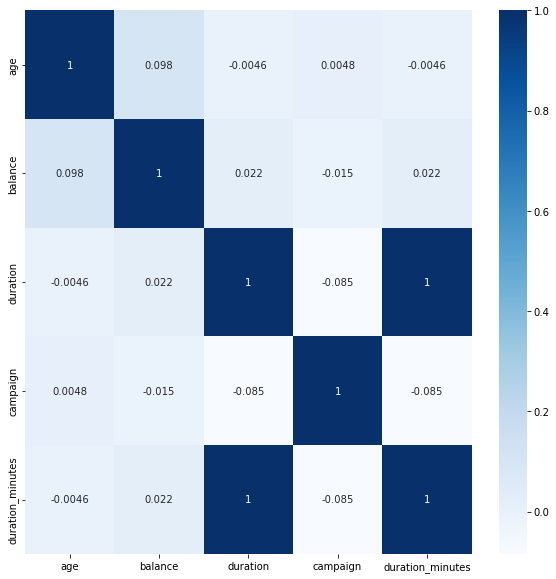

In [83]:
#get correlations of target columns 
corrmat = df[new_columns].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[new_columns][top_corr_features].corr(),annot=True,cmap="Blues")

.






# 4. Data Exploration and Visualization

### * Histogram plots for age, balance and duration

In [84]:
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))   #histogram
    plt.subplot(1,2,1) 
    plt.hist(df[variable], alpha=0.5)
        
     #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable], showfliers=False)
    plt.show()

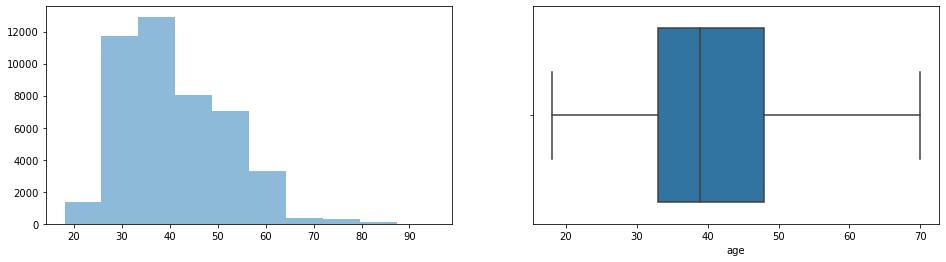

In [85]:
plotvariable(df, 'age')

maximum age group that are contacted are from 30 to 50. 

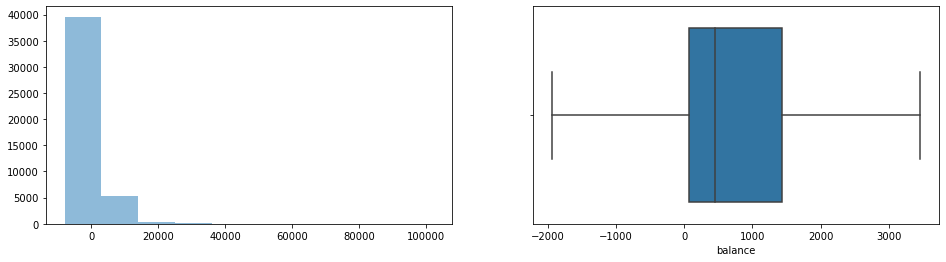

In [86]:
plotvariable(df, 'balance')

most of the contacted peoples balance on account are reported to be around 1-1500 euro

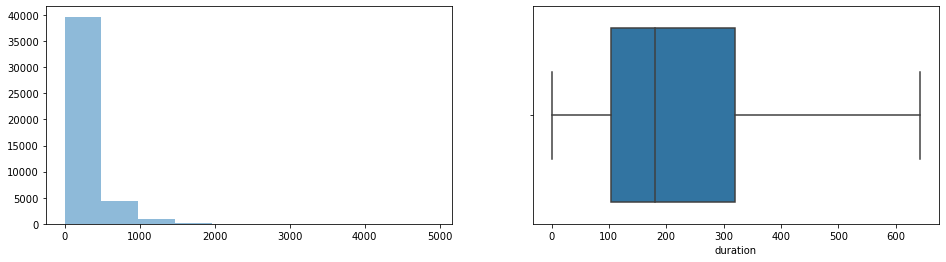

In [87]:
plotvariable(df, 'duration')

The maximum amount of call duration to the individuals were about 100-300 seconds

### * Finding total number of subscribers on the basis of their job

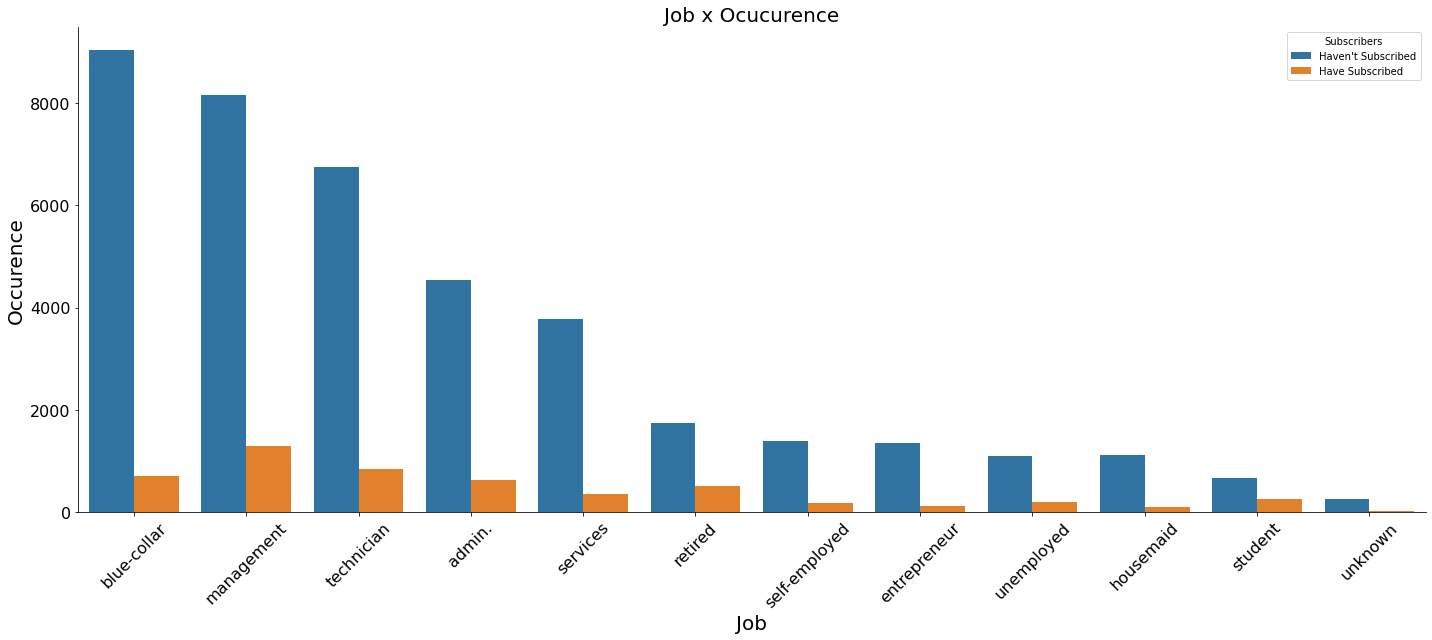

In [55]:
fig, (ax2) = plt.subplots(nrows = 1, ncols = 1, figsize = (14, 7))
fig.set_size_inches(20, 9)

sns.countplot(df['job'], data = df, hue = 'y', ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Job', fontsize=20)
ax2.set_ylabel('Occurence', fontsize=20)
ax2.set_title('Job x Ocucurence', fontsize=20)
ax2.tick_params(labelsize=16)
ax2.set_xticklabels(replaceStruct['job'], rotation=45)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])

.


### * Calculating the average balance of people from each group(col age_category)

In [63]:
ageGroup1 = df[df['age_category']=='1'] ['balance'].mean()
ageGroup2 = df[df['age_category']=='2'] ['balance'].mean()
ageGroup3 = df[df['age_category']=='3'] ['balance'].mean()
ageGroup4 = df[df['age_category']=='4'] ['balance'].mean()
ageGroup5 = df[df['age_category']=='5'] ['balance'].mean()
ageGroup6 = df[df['age_category']=='6'] ['balance'].mean()
ageGroup7 = df[df['age_category']=='7'] ['balance'].mean()
ageGroup8 = df[df['age_category']=='8'] ['balance'].mean()
ageGroup9 = df[df['age_category']=='9'] ['balance'].mean()
ageGroup10 = df[df['age_category']=='10'] ['balance'].mean()


In [106]:
avgB = {"Group1":497.0425531914894, "ageGroup2":912.588828549263, "ageGroup3":1048.5739374780471,"ageGroup4":1204.0572036043334,
        "ageGroup5":1274.1396927016644,"ageGroup6":1359.4038834951457, "ageGroup7":1687.0242568370986,
        "ageGroup8":2226.181300813008,"ageGroup9":2939.7900943396226,"ageGroup10":3088.476923076923}
avgB

{'Group1': 497.0425531914894,
 'ageGroup2': 912.588828549263,
 'ageGroup3': 1048.5739374780471,
 'ageGroup4': 1204.0572036043334,
 'ageGroup5': 1274.1396927016644,
 'ageGroup6': 1359.4038834951457,
 'ageGroup7': 1687.0242568370986,
 'ageGroup8': 2226.181300813008,
 'ageGroup9': 2939.7900943396226,
 'ageGroup10': 3088.476923076923}

In [107]:
df1 = pd.DataFrame({
   'Group': ['ageGroup1', 'ageGroup2', 'ageGroup3', 'ageGroup4', 'ageGroup5', 'ageGroup6',
            'ageGroup7', 'ageGroup8', 'ageGroup9', 'ageGroup10'],
    'MeanB': [497.0425531914894, 912.588828549263, 1048.5739374780471, 1204.0572036043334, 1274.1396927016644,
             1359.4038834951457, 1687.0242568370986, 2226.181300813008, 2939.7900943396226, 3088.476923076923]
})
  

Text(0.5, 1.0, 'Average Balance on the basis of Age_Category')

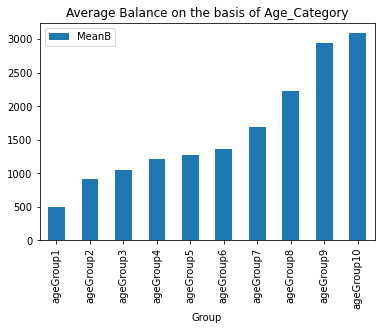

In [108]:
df1.plot(x="Group", y="MeanB", kind="bar" )
plt.title("Average Balance on the basis of Age_Category")


average balance of each 10 age groups

In [96]:
#df.to_csv('cleanone.csv')

.



# 5. Further Analysis

Correlation of variables using Heatmap

<AxesSubplot:title={'center':'Correlation of Attributes'}>

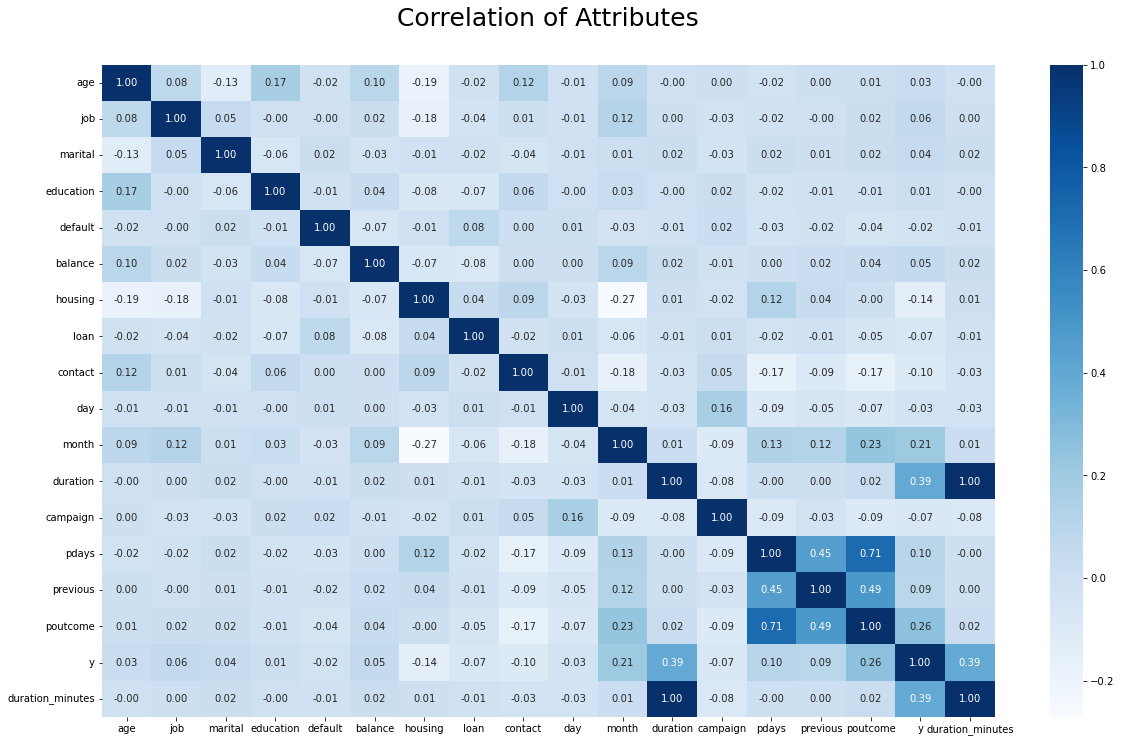

In [95]:
plt.figure(figsize = (20,12))
plt.title('Correlation of Attributes', y=1.05, size=25)
sns.heatmap(df.corr(), cmap='Blues',annot=True, fmt='.2f')

Comments: From the above heatmap we can see that :

* 'Campaign outcome' has a strong correlation with 'duration',
* A moderate correlation between 'Campaign outcome' and 'previous contacts'.
* Mild correlations between 'balance', 'month of contact' and 'number of campaign'.

###  Total number of subscribers and non subscribers

In [96]:
subscriber_counts = pd.DataFrame(df["y"].value_counts()).reset_index()
subscriber_counts.columns =["Labels","y"]
subscriber_counts

,Labels,y
0,0,39922
1,1,5289


Comment: Out of 45211 data points, 39922 are labeled as 'no' and 5289 as 'yes'. Percentage of clients who did not subscribe is significantlly greater than clients who subscribed. I have also shown the percentage using in pie chart below.

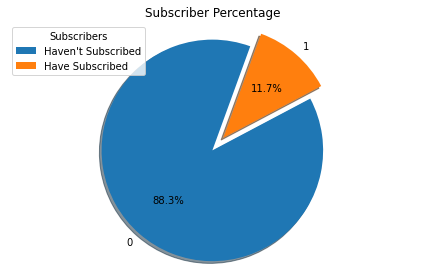

In [97]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(subscriber_counts["y"], explode=explode, labels=subscriber_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Subscriber Percentage")

plt.tight_layout() 
plt.legend(title='Subscribers', labels=["Haven't Subscribed", 'Have Subscribed'])
plt.show()


The large number of peoples doesn't subscribed only around 11% has subscribed a term deposit

Job Distribution

[Text(0, 0, 'blue-collar'),
 Text(1, 0, 'management'),
 Text(2, 0, 'technician'),
 Text(3, 0, 'admin.'),
 Text(4, 0, 'services'),
 Text(5, 0, 'retired'),
 Text(6, 0, 'self-employed'),
 Text(7, 0, 'entrepreneur'),
 Text(8, 0, 'unemployed'),
 Text(9, 0, 'housemaid'),
 Text(10, 0, 'student'),
 Text(11, 0, 'unknown')]

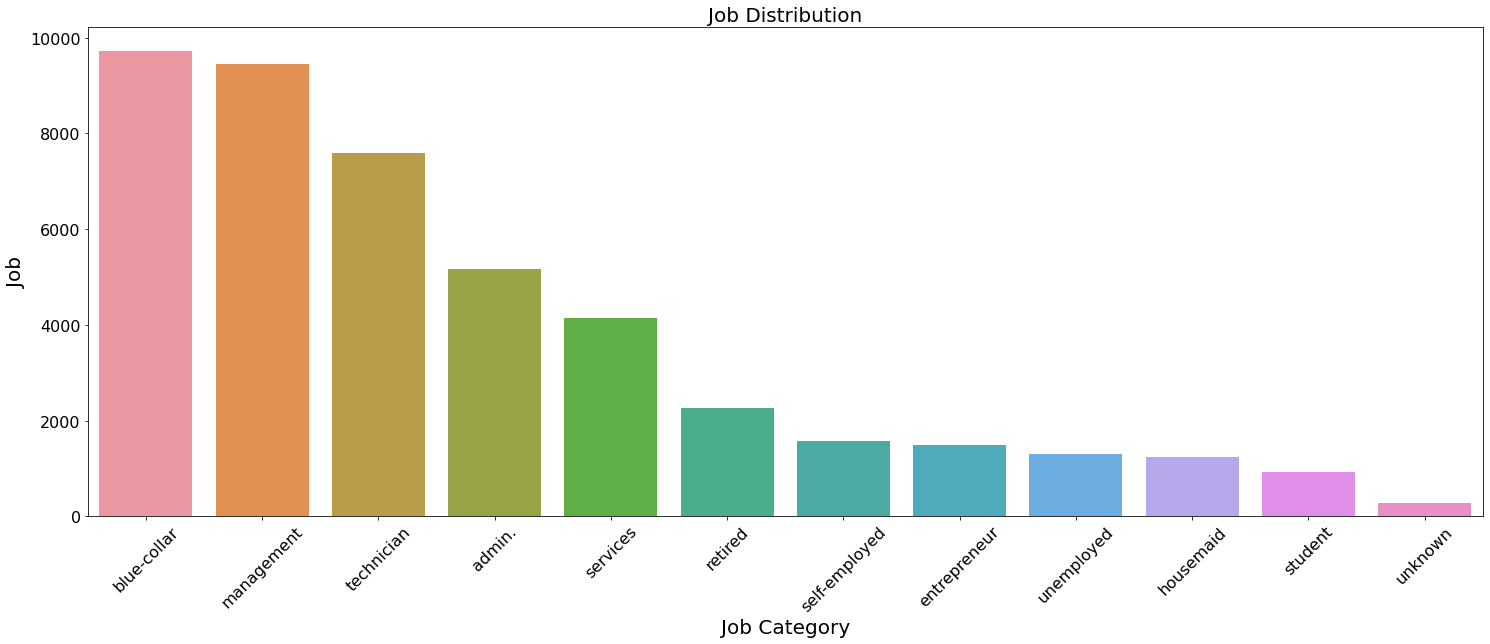

In [109]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 6))
fig.set_size_inches(25, 9)

sns.countplot(x = 'job', data = df, ax = ax1, )
ax1.set_xlabel('Job Category', fontsize=20)
ax1.set_ylabel('Job', fontsize=20)
ax1.set_title('Job Distribution', fontsize=20)
ax1.tick_params(labelsize=16)
ax1.set_xticklabels(replaceStruct['job'], rotation=45)


.

### Campaign Distrbution:-

KeyError: 'y'

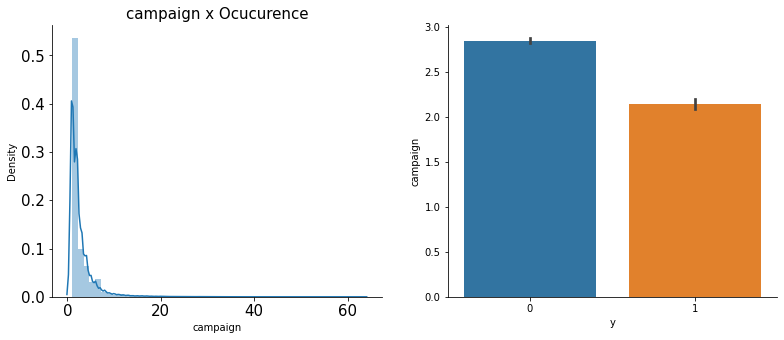

In [98]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.distplot(df['campaign'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('campaign x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="y", y="campaign", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(replaceStruct['y'])

Comments : About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

Poutcome Distribution

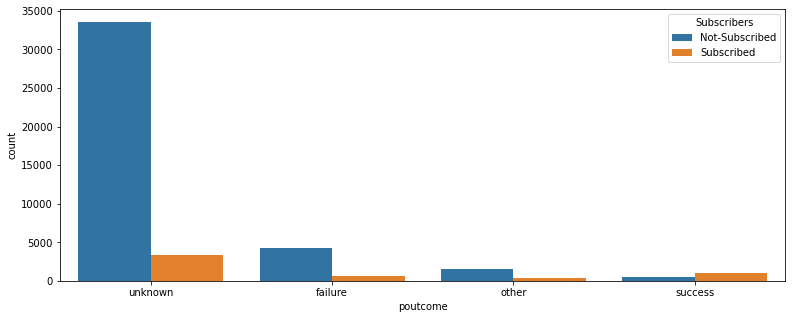

In [110]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 5))
sns.countplot(x = 'poutcome', data=df, hue='y')
ax.set_xticklabels(replaceStruct['poutcome'])
plt.legend(title='Subscribers', labels=["Not-Subscribed", 'Subscribed'])

Comments : From the above count plot we can see that the outcome of the previouly marketing campaign is mostly unknown(nonexistent). Failure rate is higher is than the success rate.

Day Distribution

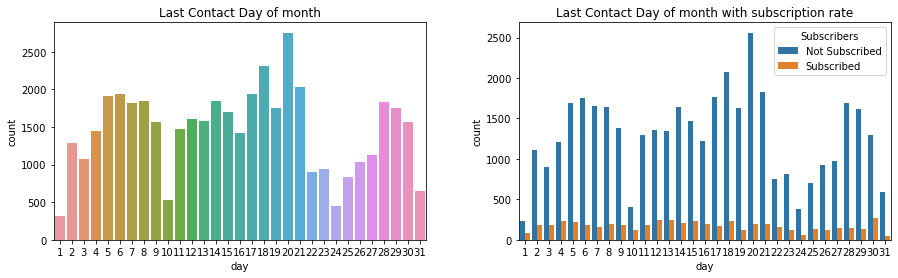

In [111]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(df['day'],ax = ax1)
ax1.set_title('Last Contact Day of month')


sns.countplot(x = 'day', data=df, hue='y',ax = ax2)
ax2.set_title('Last Contact Day of month with subscription rate')

plt.subplots_adjust(wspace=0.25)
plt.legend(title='Subscribers', labels=["Not Subscribed", 'Subscribed'])

Comments : From the above graph we can see that number of contacts made is almost same for all the days but still 20th day has more data points.

### Month Distribution

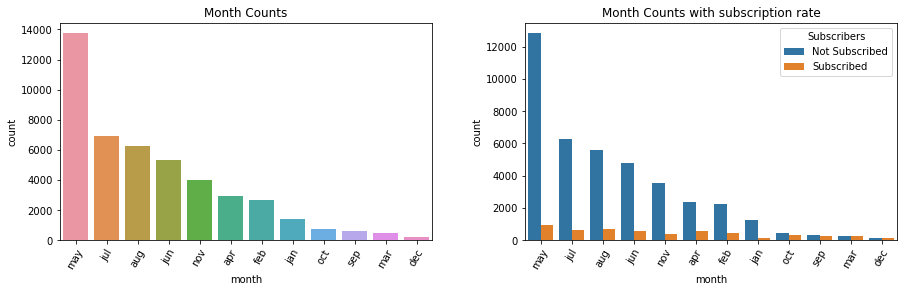

In [112]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,4))

sns.countplot(df['month'],ax = ax1)
ax1.set_xticklabels(replaceStruct['month'], rotation=60)
ax1.set_title('Month Counts')


sns.countplot(x = 'month', data=df, hue='y',ax = ax2)
ax2.set_xticklabels(replaceStruct['month'], rotation=60)
ax2.set_title('Month Counts with subscription rate')

plt.subplots_adjust(wspace=0.25)
plt.legend(title='Subscribers', labels=["Not Subscribed", 'Subscribed'])

.

### Duration Distribution 


KeyError: 'y'

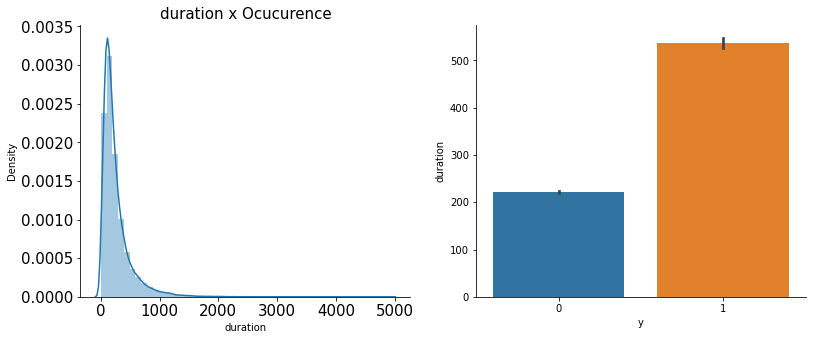

In [100]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.distplot(df['duration'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('duration x Ocucurence', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x="y", y="duration", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(replaceStruct['y'])

Comments : From above we can see that the long tail towards right (right skewed) in the duration indicates that most of the calls are relatively short aslo large number of outliers presense in the dataset. If duration is between 5 to 10 minutes then clients are more likely to subscribe for the term deposite.

### Density Plot

<AxesSubplot:xlabel='education', ylabel='Density'>

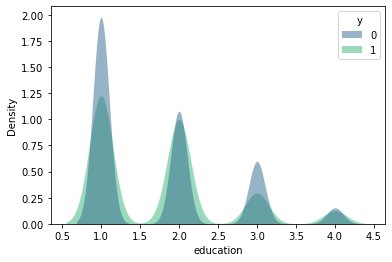

In [113]:
sns.kdeplot(
   data=df, x="education", hue="y",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)

### Checking Outliers

Text(0.5, 1.0, 'Outliers Detection')

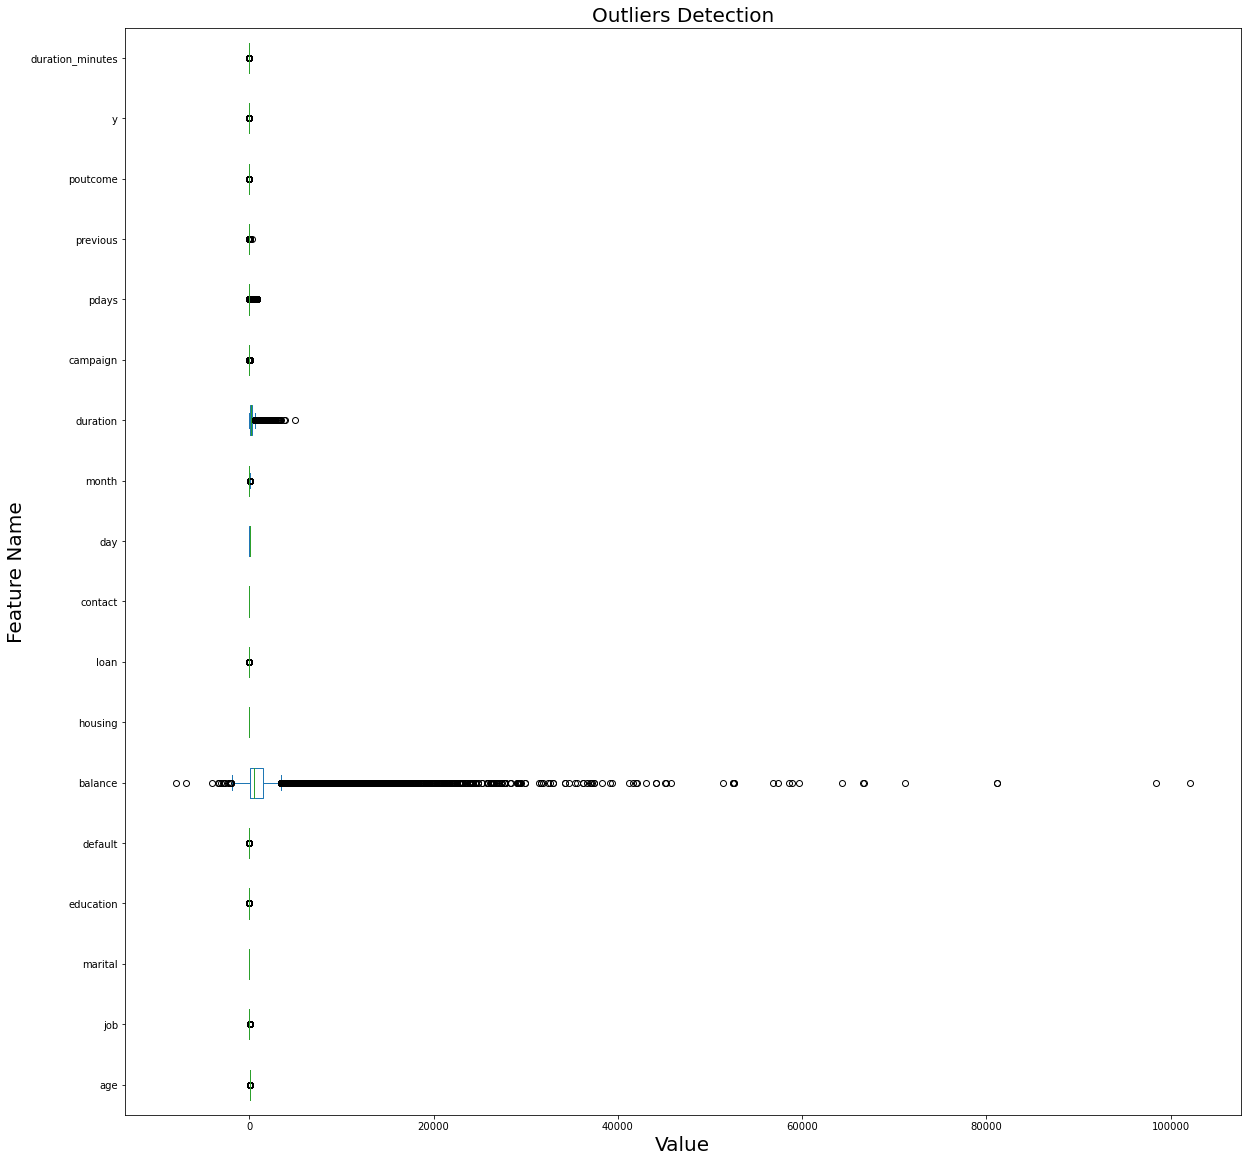

In [114]:
df.plot(kind='box', figsize=(20,20), vert=False)
plt.xlabel("Value", fontsize= 20)
plt.ylabel("Feature Name", fontsize= 20)
plt.title("Outliers Detection", fontsize= 20)

Comments : From above boxplot we can see there are outliers present in the dataset. By above plot we can clearly see that the age, balance, duration, campaign, pdays, and previous columns have outliers.

### Pair plot that includes all the columns of the data frame

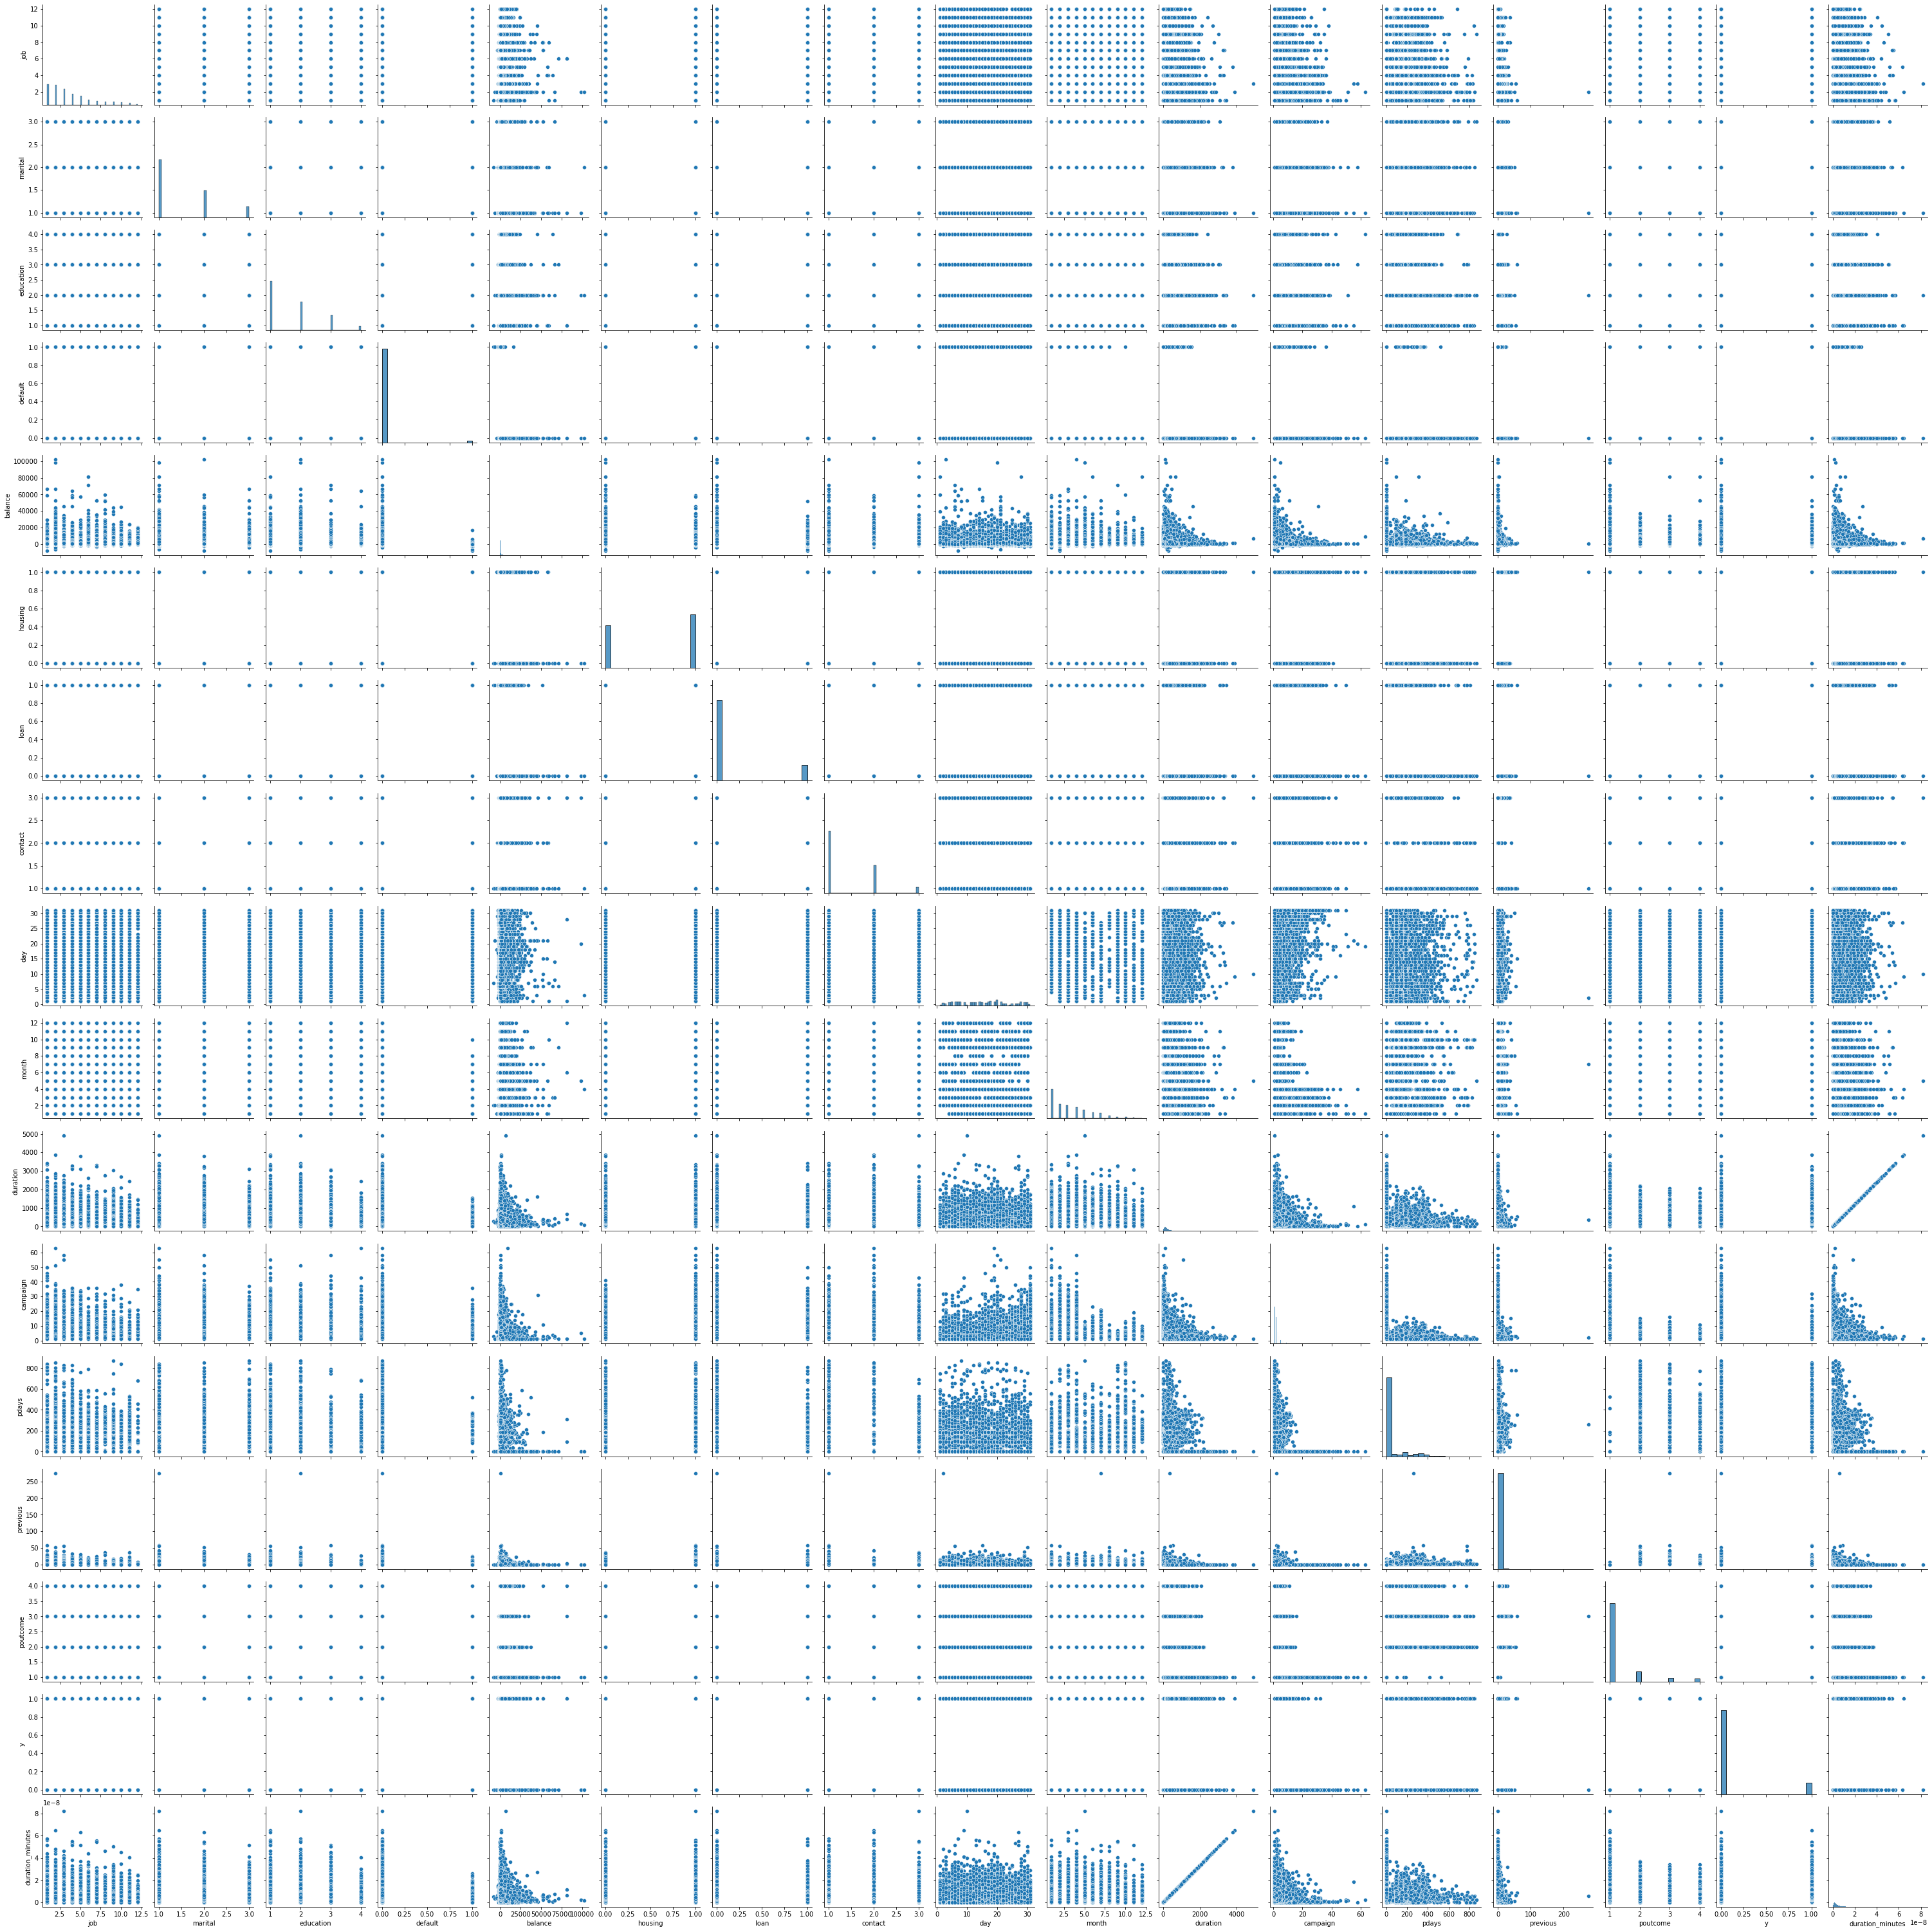

In [101]:
sns.pairplot(df.iloc[:,1:])

Comments : From the above pair plot we can infer the association among the attributes and target column as follows:

* 'Age' column is slightly right skewed. Most of the client age is between 25 to 65 years.
* 'Job' Here the number of clients who have 'blue-collar','management' and 'technician' are more in ou dataset and it is skewed towards right.
* 'marital' from above we can see that married clients are more tend to subscribe for the term deposite.
* 'Education' clients with higher education are more and also there are many clients whose education level is unknown.
* 'Balance' there is a long tail towards right side in balance column which would be the outliers.
* 'Housing' clients who dont have housing loan are more tend to subscrive for the term deposite..
* 'Duration' the skewed in the duration indicates that most of the calls are relatively short aslo large number of outliers presense in the dataset.
* 'Campaign' most of the clients have been contacted by the bank between 1 to 5 times. There are some clients who have been contacted by the bank more than 20 times and also we can see that their probability towards the term deposite is very low or alomost 0. Higher subscriber rate when calls < 5.

## Model Building

Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

Generating Dummy Variables

Three columns to convert into dummy variables are 'job', 'marital', 'poutcome

In [102]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category,duration_minutes
0,58,2,1,2,0,2143,1,0,2,5,1,261,1,-1,0,1,0,7,4.350000e-09
1,44,3,2,1,0,29,1,0,2,5,1,151,1,-1,0,1,0,6,2.516667e-09
2,33,8,1,1,0,2,1,1,2,5,1,76,1,-1,0,1,0,4,1.266667e-09
3,47,1,1,4,0,1506,1,0,2,5,1,92,1,-1,0,1,0,6,1.533333e-09
4,33,12,2,4,0,1,0,0,2,5,1,198,1,-1,0,1,0,4,3.300000e-09


In [103]:
oneHotCols=["job", "marital", "poutcome"]
df=pd.get_dummies(df, columns=oneHotCols)
print('dummy variables created')

dummy variables created


In [104]:
df.head(2)


,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_10,job_11,job_12,marital_1,marital_2,marital_3,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,58,2,0,2143,1,0,2,5,1,261,...,0,0,0,1,0,0,1,0,0,0
1,44,1,0,29,1,0,2,5,1,151,...,0,0,0,0,1,0,1,0,0,0


In [105]:
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'age_category', 'duration_minutes', 'job_1', 'job_2', 'job_3', 'job_4',
       'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'job_11',
       'job_12', 'marital_1', 'marital_2', 'marital_3', 'poutcome_1',
       'poutcome_2', 'poutcome_3', 'poutcome_4'],
      dtype='object')

In [106]:
df.shape

(45211, 35)

### Spliting the data into training and test set in the ratio of 70:30

In [107]:
X = df.drop('y', axis=1)
y = df[['y']]
df.head(2)

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_10,job_11,job_12,marital_1,marital_2,marital_3,poutcome_1,poutcome_2,poutcome_3,poutcome_4
0,58,2,0,2143,1,0,2,5,1,261,...,0,0,0,1,0,0,1,0,0,0
1,44,1,0,29,1,0,2,5,1,151,...,0,0,0,0,1,0,1,0,0,0


In [108]:
from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('x train data {}'.format(x_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (31647, 34)
y train data (31647, 1)
x test data  (13564, 34)
y test data  (13564, 1)


Here I;m scalling our x train and x test data and assigning to X_train and X_test

In [114]:
X_train_scaled = preprocessing.scale(x_train)
X_test_scaled = preprocessing.scale(X_test)

X_train = X_train_scaled
X_test  = X_test_scaled

## Comparing base models

* Here, I am using 'LogisticRegression', and 'DecisionTreeClassifier' base classification algorithms and will be comparaing 
their results with 'Accuracy', 'Precision', 'Recall', 'F1 Score' and confusion matrix.
* I will also evaluate our model using k-fold cross validation technique


In [117]:
# prepare cross validation
from sklearn import model_selection

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=None)

### Logistic Regression

In [125]:
from sklearn.model_selection import train_test_split
LogReg = LogisticRegression(solver = 'lbfgs')
LogReg.fit(X_train, y_train.values.ravel())

# Predicting for test set
LogReg_y_pred               = LogReg.predict(X_test)
LogReg_Score                = LogReg.score(X_test, y_test)

LogReg_ScoreAccuracy        = accuracy_score(y_test, LogReg_y_pred)

LogReg_PrecisonScore        = precision_score(y_test, LogReg_y_pred)
LogReg_RecollScore          = recall_score(y_test, LogReg_y_pred)
LogReg_F1                   = f1_score(y_test, LogReg_y_pred)

cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

base_model_results = pd.DataFrame([['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisonScore,
                                LogReg_RecollScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])

print('\nLogistic Regression classification Report : \n',metrics.classification_report(y_test, LogReg_y_pred))



Logistic Regression classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11966
           1       0.64      0.33      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564



### Decision Tree

In [129]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

# Predicting for test set
dTree_y_pred               = dTree.predict(X_test)
dTree_Score                = dTree.score(X_test, y_test)

dTree_ScoreAccuracy        = accuracy_score(y_test, dTree_y_pred)
dTree_PrecisonScore        = precision_score(y_test, dTree_y_pred)
dTree_RecollScore          = recall_score(y_test, dTree_y_pred)
dTree_F1                   = f1_score(y_test, dTree_y_pred)

cross_validation_result = model_selection.cross_val_score(dTree, X_train, y_train, cv=kfold, scoring='accuracy')
dTree_models_results = pd.DataFrame([['Decision Tree ', dTree_ScoreAccuracy, dTree_PrecisonScore,
                                dTree_RecollScore, dTree_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(dTree_models_results, ignore_index = True)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

print('\nDTree classification Report : \n',metrics.classification_report(y_test, dTree_y_pred))

1.0
0.8759952816278384

DTree classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.47      0.49      0.48      1598

    accuracy                           0.88     13564
   macro avg       0.70      0.71      0.71     13564
weighted avg       0.88      0.88      0.88     13564



Comment : From above accuracy we can see that there is a high degree of overfitting in the model due to which the test accuracy drops drastically

Reducing over fitting (Regularization) 
For the improvement, Here I will Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy

In [126]:
dTreePR = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
dTreePR.fit(X_train, y_train)
print(dTreePR.score(X_train, y_train))
print(dTreePR.score(X_test, y_test))

0.901317660441748
0.8977440283102329


Decision Tree(Prune)

In [127]:
# Predicting for test set
dTreePR_y_pred               = dTreePR.predict(X_test)
dTreePR_Score                = dTreePR.score(X_test, y_test)

dTreePR_ScoreAccuracy        = accuracy_score(y_test, dTreePR_y_pred)
dTreePR_PrecisonScore        = precision_score(y_test, dTreePR_y_pred)
dTreePR_RecollScore          = recall_score(y_test, dTreePR_y_pred)
dTreePR_F1                   = f1_score(y_test, dTreePR_y_pred)

cross_validation_result = model_selection.cross_val_score(dTreePR, X_train, y_train, cv=kfold, scoring='accuracy')
dTreePR_models_results = pd.DataFrame([['Decision Tree (Prune)', dTreePR_ScoreAccuracy, dTreePR_PrecisonScore,
                                dTreePR_RecollScore, dTreePR_F1, cross_validation_result.mean(), cross_validation_result.std()]], 
                              columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation'])
base_model_results = base_model_results.append(dTreePR_models_results, ignore_index = True)

print('\nDTree with Prune classification Report : \n',metrics.classification_report(y_test, dTreePR_y_pred))


DTree with Prune classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.62      0.33      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



Comment : Now we can see that accuracy increased after prunning.

In [130]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.899882,0.644578,0.334793,0.440692,0.900496,0.004066
1,Decision Tree (Prune),0.897744,0.623104,0.334168,0.435031,0.900781,0.003434
2,Decision Tree,0.875995,0.474453,0.488110,0.481184,0.876102,0.005741


#### Connfusion matrix of above base models

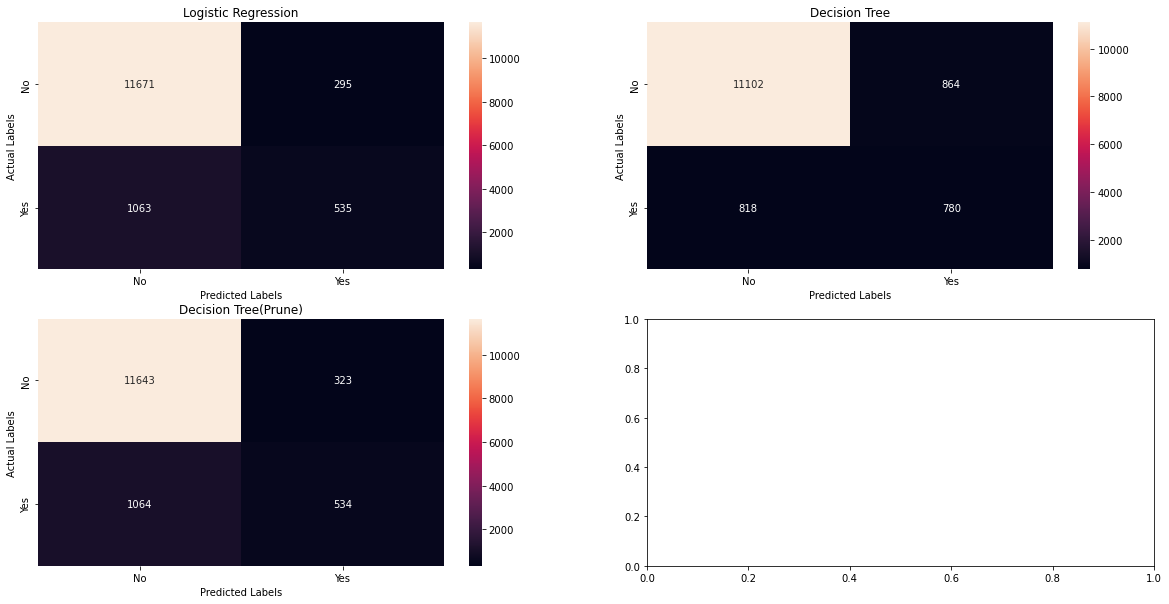

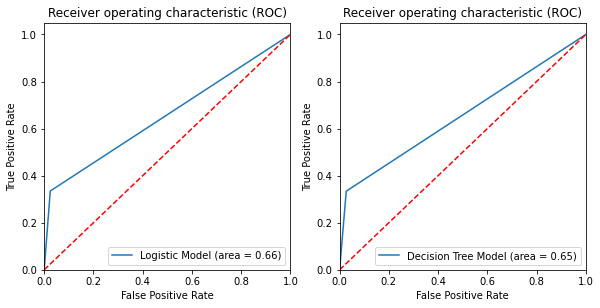

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.899882,0.644578,0.334793,0.440692,0.900496,0.004066
1,Decision Tree (Prune),0.897744,0.623104,0.334168,0.435031,0.900781,0.003434
2,Decision Tree,0.875995,0.474453,0.488110,0.481184,0.876102,0.005741


In [148]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))

cm=metrics.confusion_matrix(y_test, LogReg_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[0,0])
axs[0,0].set_xlabel('Predicted Labels');
axs[0,0].set_ylabel('Actual Labels'); 
axs[0,0].set_title('Logistic Regression'); 

cm=metrics.confusion_matrix(y_test, dTree_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[0,1])
axs[0,1].set_xlabel('Predicted Labels');
axs[0,1].set_ylabel('Actual Labels'); 
axs[0,1].set_title('Decision Tree');

cm=metrics.confusion_matrix(y_test, dTreePR_y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
sns.heatmap(df_cm, annot=True ,fmt='g', ax = axs[1,0])
axs[1,0].set_xlabel('Predicted Labels');
axs[1,0].set_ylabel('Actual Labels'); 
axs[1,0].set_title('Decision Tree(Prune)');

# ROC graph

logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_test, LogReg_y_pred)
logistic_roc_auc = metrics.roc_auc_score(y_test, LogReg_y_pred)
fig1_graph = plt.figure(figsize=(15,10))
fig1_graph.add_subplot(2,3,1)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

dTree_fpr, dTree_tpr, dTree_threshold = metrics.roc_curve(y_test,  dTreePR_y_pred)
dTree_roc_auc = metrics.roc_auc_score(y_test,  dTreePR_y_pred)
fig1_graph.add_subplot(2,3,2)
plt.plot(dTree_fpr, dTree_tpr, label='Decision Tree Model (area = %0.2f)' % dTree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

base_model_results

Base Model Comparison : From the above confusion matrix, ROC curve and Accuracy Table we can see that both Decision Tree and Logistic Regression obtained the highest accuracy with lesser runtime and is more stable in the results. In comparison to two of these models, Decision Tree seems to more accurate. So, Will be using Decision Tree and Logistic Regression in Ensemble technique.